In [89]:
# project 1: housing price prediction:

import os
import tarfile
from six.moves import urllib

# define strings for dataset download
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

# write a function to download and decompress the data
# create a dataset directory in the workspace, donwloads the housing.tgz file
# and extracts the housing.csv from it in the directory
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    # return true if housing_path is an existing directory (only when it is a directory not a filename)
    if not os.path.isdir(housing_path):
        # if the path doesnt exist, create one
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [90]:
# load the data using pandas
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [91]:
fetch_housing_data()

In [92]:
housing = load_housing_data()
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26    

In [93]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [94]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


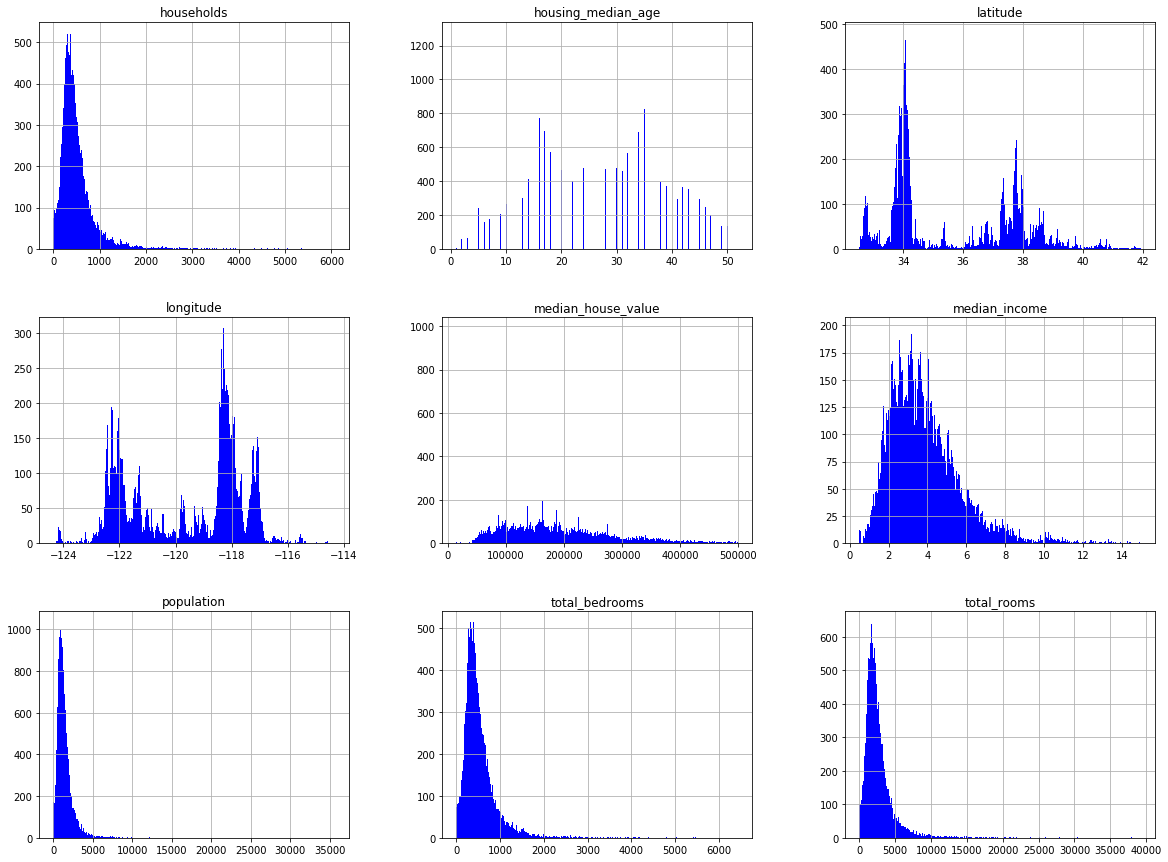

In [95]:
# we can easily plot histograms of the raw data using the hist method of a dataframe
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 500, color = 'b',figsize = (20, 15))
plt.show()

In [96]:
# now we want to set aside the test set from the original data
import numpy as np
def split_train_set(data, test_ratio):
    # return a permutation combination of data index
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    # indices for test data
    test_indices = shuffled_indices[: test_set_size]
    # indices for training data
    train_indices = shuffled_indices[test_set_size:]
    # return two data frames
    return data.iloc[train_indices], data.iloc[test_indices]
# we can specify the range of the location using an permutated index mask to obtain the training and testing data

In [97]:
# use the function to obtain datasets
train_set, test_set = split_train_set(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


In [98]:
# some notes about hash: hash values are created in a way that the resulting values are evenly distributed to reduce the 
# number of hash collisions. hash value enable quick lookup of values in a large collection of values. hash can be implemented 
# for dict and set but not mutable objects as the hash value would change overtime

In [99]:
# use instance's identifier to decide whether or not should go in the test set: compute a hash and put the instance in the test
# set if the value is lower or equal to 51
import hashlib
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [100]:
# use the row index as the ID:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [101]:
# splitting data using sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 41)

In [102]:
# should not have too many income categories, create income category attribute by dividing the median incom by 1.5, round up
# using ceiling and merge all categories greater than 5 to category 5
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
# series.where returns the series which meets the conditions
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)
housing["income_cat"]

0        5.0
1        5.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [103]:
# now we can stratify sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 41)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [104]:
# remove income_cat attribute now so the data is back to its original state
strat_test_set["income_cat"]
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis= 1, inplace = True)

In [105]:
# explore the data
housing = strat_train_set.copy()

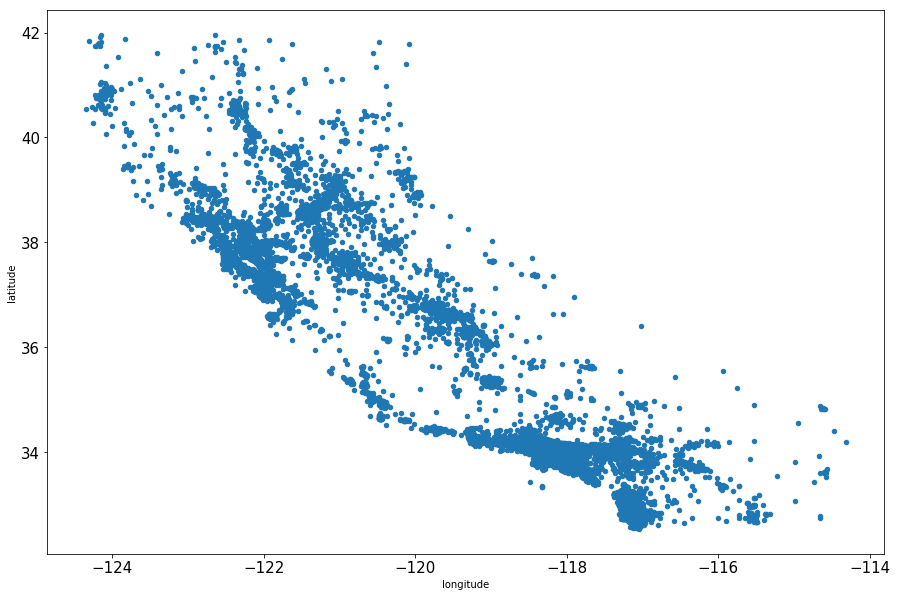

In [106]:
# visualize the data using location
# can directly plot using dataframe
housing.plot(kind = "scatter", x = "longitude", y = "latitude", figsize =(15, 10), fontsize = 15)

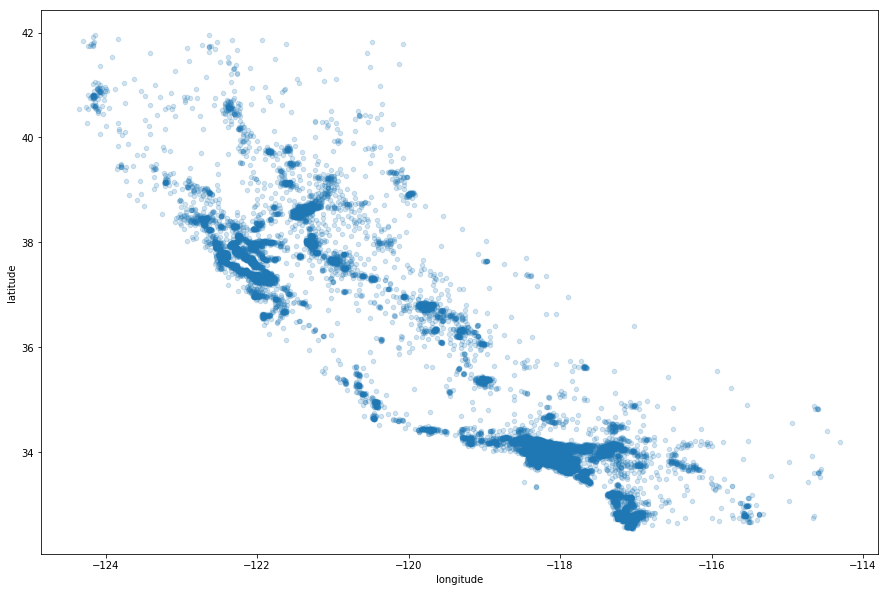

In [107]:
# visualize the geological density of the data
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.2, figsize= (15, 10))

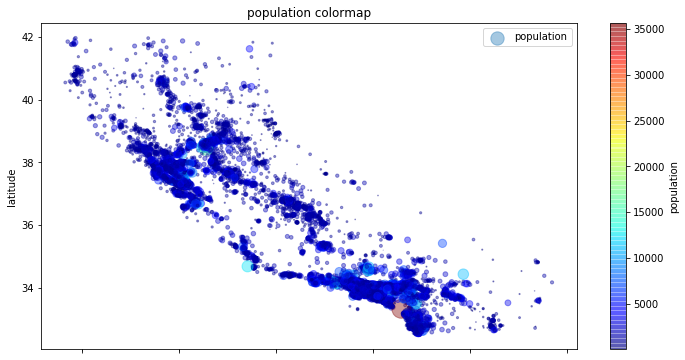

In [108]:
# now we want to visualize the housing price across the map
# option s: radius of each circle, c: what color represents
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population", c = "population",
            cmap = plt.get_cmap("jet"), colorbar = True, figsize = (12, 6), title= "population colormap")
plt.legend()

In [111]:
# looking for correlation in the data with house price: use P value which is cov(X, Y)/std(X)*std(Y)
corr_matrix = housing.corr(method = 'pearson')
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687668
total_rooms           0.131987
housing_median_age    0.111686
households            0.063285
total_bedrooms        0.046671
population           -0.024677
longitude            -0.049897
latitude             -0.141620
Name: median_house_value, dtype: float64

C:\Users\Leo Du\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CC83ED7F60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CC8371A550>]], dtype=object)

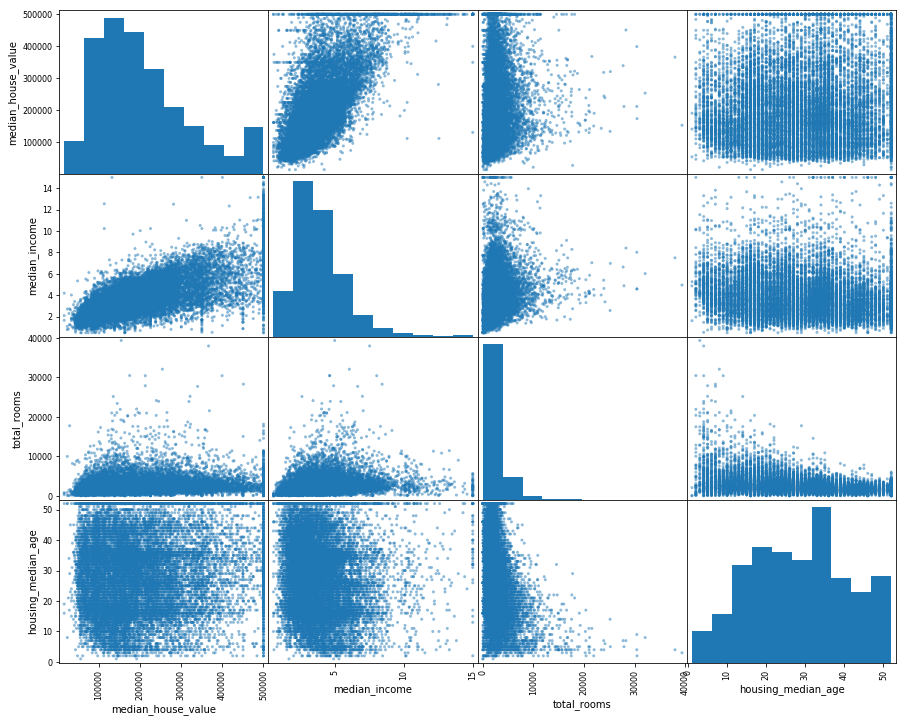

In [120]:
# now we know potential correlated data column, we can use scatter matrix to plot numerical attribute against other attribute
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (15, 12))

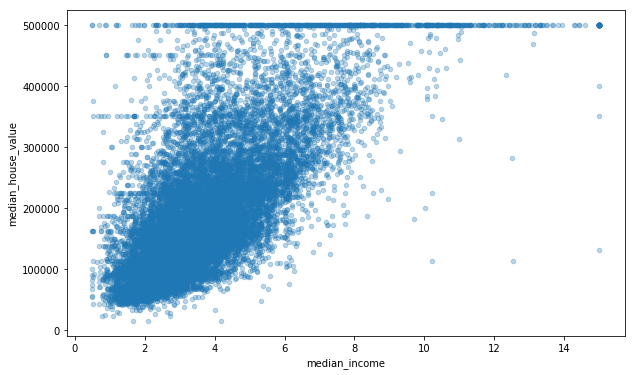

In [23]:
# correlation seen between median house value and median income
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.3, figsize = (10,6))

In [127]:
# we can try to create new attributes which might be more correlated to the median house price
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]= housing["population"]/housing["households"]

In [128]:
# now we want to see the correlation matrix again, do we have features with better correlation?
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687668
rooms_per_household         0.155908
total_rooms                 0.131987
housing_median_age          0.111686
households                  0.063285
total_bedrooms              0.046671
population                 -0.024677
population_per_household   -0.032129
population_per_houshold    -0.032129
longitude                  -0.049897
latitude                   -0.141620
bedrooms_per_room          -0.256628
Name: median_house_value, dtype: float64

In [129]:
# now we see that we have features with higher correlation with median_house_value
# data cleaning: .drop will create a copy of the data and does not affect strat_train_set
housing = strat_train_set.drop("median_house_value", axis  = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [27]:
# take care of the missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy= "median")
# drop the non numerical data to obtain the median
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns= housing_num.columns)


In [28]:
# should convert the ocean_proximity data to numerical data: transformer for this class called labelencoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
# transformed numerical data for ocean proximity
housing_cat_encoded

array([0, 0, 1, ..., 3, 0, 0], dtype=int64)

In [131]:
# we want to change the encoding to one-hot encoding, which encode either 1 or 0 for each class
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
# put encoded housing cat into fit_transform so it turns into one hot encoded version
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
# one hot encoded data is sparse matrix which can save a lot of memory, just save the location of the non-zero values
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [133]:
# sparse matrix save memory by just saving the location of the nonzero data. ndarray save all the information
# .toarray function convert sparse matrix to a np ndarray
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]])

In [134]:
# can convert the test categories to one hot vector in one step
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ..., 
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [142]:
# it can be seen that when encoding numerical data, the encoded sequance is from small to big values
from sklearn.preprocessing import LabelBinarizer
data = [10,9,8,7,6,5]
encoder = LabelBinarizer()
cat = encoder.fit(data)
encoder.fit_transform(data)

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [144]:
# custom transformers: small transformer class that adds the combined attributes from earlier
# baseestimator is base class for all estimators
# transformmixin is base class for all mixin class for transformer

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    # method constructors
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    # method fit
    def fit(self, X, y = None):
        return self
    # method transform
    def transform(self, X, y = None):
        rooms_per_household = X[:,rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            # np.c_: return ndarray with each data as column
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
# housing.values is the ndarray of all the datavalue (not a dataframe)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-118.03, 33.82, 20.0, ..., '<1H OCEAN', 5.639830508474576,
        2.7012711864406778],
       [-117.85, 33.62, 13.0, ..., '<1H OCEAN', 7.842900302114804,
        2.8172205438066467],
       [-121.51, 38.57, 36.0, ..., 'INLAND', 4.170068027210885,
        2.891156462585034],
       ..., 
       [-122.52, 37.9, 16.0, ..., 'NEAR BAY', 4.896551724137931,
        1.9798850574712643],
       [-121.86, 37.38, 15.0, ..., '<1H OCEAN', 5.017114914425428,
        3.374083129584352],
       [-118.06, 34.1, 38.0, ..., '<1H OCEAN', 5.288503253796096,
        2.8373101952277655]], dtype=object)

In [145]:
# feature scaling: when input data has very different numerical scales, ML algorithms doesnt perform well.
# two ways to get all attributes to have same scale: minmax scaling and standardization.
# minmax is more affected by outliers but bound the data to (0,1) range
# standardization is less affected by outliers but doesnt bound the data

In [148]:
# transform pipeline which help with such processes 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', Imputer(strategy= "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# execute the pipeline all at once, fit and transform the data using the entire pipeline
housing_num_tr = num_pipeline.fit_transform(housing_num)

array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.08686294,
        -0.05081885, -0.59589883],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.97763978,
        -0.03281407, -1.31536433],
       [-0.97017917,  1.37993786,  0.58052093, ..., -0.50741255,
        -0.0213332 ,  0.8634663 ],
       ..., 
       [-1.47483874,  1.06553891, -1.00665025, ..., -0.21367022,
        -0.16283672,  0.33588826],
       [-1.1450612 ,  0.82152778, -1.08600881, ..., -0.16492238,
         0.05365635, -0.24709171],
       [ 0.75365796, -0.71761934,  0.73923805, ..., -0.05519075,
        -0.02969452, -0.49016635]])

In [151]:
# how to join all transformations into a single pipeline: give a list of transformers, when transform method is called,
# it runs each transformer's transform method in parallel and then concatenates them and return the results
# a pipeline handling both numerical and categorical attributes look like this:

# subpipeline starts with a selector transformer, transform the data by selecting the desired attributes, drop the rest and conver
# the resulting dataframe to numpy array. We need to write a simple transformer to do this

# create a dataframeselector class which would implement the fit transform pipeline and transform the result into a numpy ndarray
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

from sklearn.base import BaseEstimator, TransformerMixin
class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = encoder.fit_transform(X)
        else:
            result = encoder.transform(X)
        return result;   
    
from sklearn.pipeline import FeatureUnion
# numerical attributes
num_attribs = list(housing_num)
# categorical attributes
cat_attribs = ["ocean_proximity"]
# pipeline for transforming the numerical data
# form is a list of dictionaries 
num_pipeline = Pipeline([
    # select the right data frame column
    ('selector', DataFrameSelector(num_attribs)),
    # fill in the missing data using median value
    ('imputer', Imputer(strategy="median")),
    # add these attributes together
    ('attribs_adder', CombinedAttributesAdder()),
    # using std scaler which will normalize the spreadout data to a 
    # normalized scale, this is useful to minimize the effect of outliers data
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer_new())
])

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

# num_pipeline: select the right data, impute the data with mean, combine the attributes. scale the data using std
# cat_pipeline: select the right data, use labelbinarizer to change the categories to onehotencoded version
# full pipeline is a featureunion instance, which process the given data using the transformer provided in the list
# then it will combine the processed data using fit_transform
full_pipeline


FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'])), ('imputer', Imputer(axis=0, copy=True, missing_values='...taFrameSelector(attribute_names=['ocean_proximity'])), ('label_binarizer', LabelBinarizer_new())]))],
       transformer_weights=None)

In [160]:
# now we can apply the full feature union to accomplish transform both on numerical and categorical 
# data field and return a combined feature space (ndarray)
# apply the union transform
#housing.shape
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.astype(np.float16)
housing_prepared

Initializing encoder


array([[ 0.76864785, -0.84900995, -0.68921602, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85858718, -0.94286039, -1.24472593, ...,  0.        ,
         0.        ,  0.        ],
       [-0.97017917,  1.37993786,  0.58052093, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [-1.47483874,  1.06553891, -1.00665025, ...,  0.        ,
         1.        ,  0.        ],
       [-1.1450612 ,  0.82152778, -1.08600881, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75365796, -0.71761934,  0.73923805, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
# now we have finished cleaning the data using the combined pipeline and now we are ready to fit the data
# train a linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
some_data = housing.iloc[:5]
some_label = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[  7.68647850e-01,  -8.49009951e-01,  -6.89216016e-01,
          1.09751117e-02,  -1.73566564e-01,  -1.32532190e-01,
         -7.19780346e-02,   1.12857229e+00,   8.68629385e-02,
         -5.08188522e-02,  -5.95898825e-01,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  8.58587179e-01,  -9.42860386e-01,  -1.24472593e+00,
          1.16579586e+00,   2.87262042e-01,   3.90209352e-01,
          4.24401035e-01,   5.85418913e+00,   9.77639776e-01,
         -3.28140707e-02,  -1.31536433e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [ -9.70179174e-01,   1.37993786e+00,   5.80520935e-01,
         -9.24292760e-01,  -8.81437309e-01,  -8.85634412e-01,
         -9.21047496e-01,  -8.77154578e-01,  -5.07412549e-01,
         -2.13331958e-02,   8.63466295e-01,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.0000

In [41]:
# now we try to predict some results using the data
print("Predictions: \t", lin_reg.predict(some_data_prepared))
print("labels:\t\t", list(some_label))

Predictions: 	 [ 294588.38179822  636762.75387885   99093.84597554   77575.50411737
  160899.24095528]
labels:		 [318500.0, 500001.0, 93800.0, 59200.0, 150300.0]


In [42]:
# now we want to know the MeanSquare error between prediction and the real value
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_prediction, housing_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68270.528873214862

In [43]:
# lin_rmse is not so impressive! ways to interpret the results: can be due to the simplexity of the model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
# now we can evaluate the decision tree regressor
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_mse

0.0

In [45]:
# now we have investigate two models, the first one might be underfitting the data
# while the second might be overfitting the data, we need a validation set to test
# we can do a K fold cross validation using sklearn function, K fold validation: train on k-1 subsets
# test on 1 set and give the scores for each combination
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)


In [46]:
print("Scores:", rmse_scores)
print("Mean:", rmse_scores.mean())
print("Standard Deviation: ", rmse_scores.std())

Scores: [ 70758.3762676   69106.13963512  71212.08194416  73020.93218922
  69683.76111729  73165.60958688  73734.80461295  70674.99434366
  70568.9181725   70696.97657062]
Mean: 71262.259444
Standard Deviation:  1461.89000893


In [47]:
# now we can do a k fold cross validation for the linear regression model
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [48]:
print("scores: ", rmse_scores)
print("mean", rmse_scores.mean())
print("standard deviation:", rmse_scores.std())

scores:  [ 70252.13639288  64961.60724865  70853.42251118  68293.03617368
  66704.59547379  69562.85846659  71559.86323545  72058.38613875
  67112.50151766  64462.72848797]
mean 68582.1135647
standard deviation: 2563.33657825


In [49]:
# if we can try using random forest regressor, which is an ensemble methods which take the mean 
# of the decision trees
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [51]:
print("scores: ", rmse_scores)
print("mean", rmse_scores.mean())
print("standard deviation:", rmse_scores.std())

scores:  [ 50840.8377222   51539.37135534  54001.54645041  53720.99687411
  51084.56007401  52741.94352571  53420.9443083   51029.7681216
  51821.43570845  50553.61684436]
mean 52075.5020984
standard deviation: 1222.28070497


In [52]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions, housing_labels)
forest_mse
rmse_forest = np.sqrt(forest_mse)
rmse_forest

21906.94858994184

In [53]:
# by comparing the values between the rmse and scores after cross validation,
# we can see that the forest still overfit the data, but cross validation shows
# random forest is a better model compared to linear regression (underfit)
# and decision tree (overfit)

In [54]:
# how to save models
from sklearn.externals import joblib
joblib.dump(lin_reg, "lin_reg.pkl")
joblib.dump(tree_reg, "tree_reg.pkl")
joblib.dump(forest_reg, "forest_reg.pkl")

['forest_reg.pkl']

In [55]:
# now we want to pick the best hyperparameters from the model, hence we use GridsearchCV
# which try different hyperparameters specified in the param_grid dictionary and use cross validation
# to obtain the best combination
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,40], 'max_features': [2, 4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3, 10, 40], 'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 40], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10, 40], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [56]:
# get the best parameters
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 40}

In [57]:
# we can also display all the scores for all combinations:
cvres = grid_search.cv_results_
for mean_score, parames in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), cvres["params"])
   

63274.3809903 [{'max_features': 2, 'n_estimators': 3}, {'max_features': 2, 'n_estimators': 10}, {'max_features': 2, 'n_estimators': 40}, {'max_features': 4, 'n_estimators': 3}, {'max_features': 4, 'n_estimators': 10}, {'max_features': 4, 'n_estimators': 40}, {'max_features': 6, 'n_estimators': 3}, {'max_features': 6, 'n_estimators': 10}, {'max_features': 6, 'n_estimators': 40}, {'max_features': 8, 'n_estimators': 3}, {'max_features': 8, 'n_estimators': 10}, {'max_features': 8, 'n_estimators': 40}, {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}, {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}, {'bootstrap': False, 'max_features': 2, 'n_estimators': 40}, {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}, {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}, {'bootstrap': False, 'max_features': 3, 'n_estimators': 40}, {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}, {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}, {'bootstrap'

In [58]:
# grid search can also automatically evaluate whether or not the added feature should be added

In [59]:
# randomized search: evaluate randomly the features given an iteration number, better to be tailored
# to the computing power

In [60]:
# analyze the best models and their errors: we want to know the relative importance of the features
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  9.61240251e-02,   8.66028194e-02,   3.86043112e-02,
         2.23486604e-02,   1.83616643e-02,   2.29838226e-02,
         1.85115804e-02,   2.36140380e-01,   7.93098065e-02,
         9.60673237e-02,   8.76835660e-02,   1.81373182e-02,
         1.64490346e-01,   1.72418531e-04,   5.30830447e-03,
         9.15365326e-03])

In [204]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)
attributes


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [205]:
# now we can use grid search to obtain the best combination of hyperparameters
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [206]:
# now run the pipeline to clean and scale the data 
X_test_prepared = full_pipeline.transform(X_test)

In [207]:
# make prediction
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49081.0425868608

In [208]:
# now try to do a SVM regressor with various hyperparameters
from sklearn.svm import SVR
SVM_reg = SVR(kernel = 'rbf',C=1.0, epsilon=0.2)
SVM_reg.fit(housing_prepared, housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [209]:
# now try to predict 
SVM_prediction = SVM_reg.predict(X_test_prepared)
SVM_rbf_mse = mean_squared_error(y_test, SVM_prediction)
SVM_rbf_rmse = np.sqrt(SVM_rbf_mse)
SVM_rbf_rmse

119175.40473810206

In [210]:
# now we try to use different kernel
SVM_reg = SVR(kernel = 'linear', C= 1.0, epsilon= 0.2)
SVM_reg.fit(housing_prepared, housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [211]:
SVM_prediction = SVM_reg.predict(X_test_prepared)
SVM_lin_mse = mean_squared_error(y_test, SVM_prediction)
SVM_lin_rmse = np.sqrt(SVM_lin_mse)
SVM_lin_rmse

111703.54037948432

In [212]:
# now we try sigmoid kernel
SVM_reg = SVR(kernel = 'sigmoid', C = 1.0, epsilon = 0.2)
SVM_reg.fit(housing_prepared, housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [213]:
SVM_prediction = SVM_reg.predict(X_test_prepared)
SVM_sig_mse = mean_squared_error(y_test, SVM_prediction)
SVM_sig_rmse = np.sqrt(SVM_sig_mse)

In [214]:
SVM_sig_rmse

119039.73279442627

In [215]:
# a full pipeline with both preparation and prediction
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
])
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

Initializing encoder


array([ 294588.38179822,  636762.75387885,   99093.84597554,
         77575.50411737,  160899.24095528])

In [216]:
joblib.dump(full_pipeline_with_predictor, "full_predict.pkl")

['full_predict.pkl']

In [217]:
# now we want to explore the SVM model with different combination of hyperparameters
from sklearn.model_selection import GridSearchCV
# param_grid is a list of dictionaries for the gridsearchcv to iterate on 
param_grid = [
    {'kernel':['linear'], 'C':[10., 20., 30., 100.,1000., 3000.,10000.,3000.]},
    {'kernel': ['rbf'], 'C':[1.0,3.0,10.,30.,100.,300.,1000.],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

In [218]:
# try adding transformer in the preparation pipeline to sleect one the most important 
# attributes
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])
class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y = None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
    def transform(self, X):
        return X[:, self.feature_indices_] 



In [219]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  7,  9, 10, 12], dtype=int64)

In [225]:
attributes
# turn list into array
np.array(attributes)[top_k_feature_indices]
# now we selected the top k important features

array(['longitude', 'median_income', 'pop_per_hhold', 'bedrooms_per_room',
       'INLAND'],
      dtype='<U18')

In [233]:
# zip the numerical importance and corresponding attributes
sorted(zip(feature_importances, attributes), reverse = True)[:k]

[(0.23614037958568904, 'median_income'),
 (0.16449034636140231, 'INLAND'),
 (0.096124025083551085, 'longitude'),
 (0.096067323652940462, 'pop_per_hhold'),
 (0.087683566013756528, 'bedrooms_per_room')]

In [241]:
# create a new pipeline which will incorporate the top feature selection pipe
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11632,-118.03,33.82,20.0,2662.0,464.0,1275.0,472.0,6.0162,<1H OCEAN
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,<1H OCEAN
12532,-121.51,38.57,36.0,613.0,166.0,425.0,147.0,2.2031,INLAND
2600,-123.63,41.11,19.0,1797.0,384.0,1033.0,327.0,1.4911,<1H OCEAN
12074,-117.60,33.87,18.0,6450.0,1165.0,3716.0,1113.0,4.2721,INLAND
15374,-117.25,33.39,22.0,2699.0,543.0,1425.0,491.0,2.3750,<1H OCEAN
1560,-121.95,37.78,4.0,14652.0,2826.0,5613.0,2579.0,6.3942,<1H OCEAN
4720,-118.37,34.05,35.0,2457.0,552.0,1159.0,523.0,3.0862,<1H OCEAN
15654,-122.40,37.79,52.0,1185.0,660.0,1007.0,623.0,1.4552,NEAR BAY
2288,-119.75,36.78,28.0,3257.0,752.0,1981.0,712.0,2.2930,INLAND
